Load in required libraries

In [1]:
#Useful for adding the wd to the path, allows to see timecorr
import sys
sys.path.append('/app')

import timecorr as tc
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [1]:
import hypertools as hyp
print(hyp.__file__)

ModuleNotFoundError: No module named 'hypertools'

Simulate some data

In [2]:
# simulate 1 subject's timeseries
sim_1 = tc.simulate_data(S=1, T=200, K=300, set_random_seed=100)

In [4]:
# output for 1 subject is an array
print('shape : ' + str(np.shape(sim_1)))
print('type : ' + str(type(sim_1)))

shape : (200, 300)
type : <class 'numpy.ndarray'>


In [5]:
# simulate 3 subjects' timeseries
sim_3 = tc.simulate_data(S=3, T=200, K=300, set_random_seed=100)

In [6]:
# output for 3 subjects is a list of arrays
print('shape : ' + str(np.shape(sim_3)))
print('type : ' + str(type(sim_3)))
print('type for sim_3[0] : ' + str(type(sim_3[0])))

shape : (3, 200, 300)
type : <class 'list'>
type for sim_3[0] : <class 'numpy.ndarray'>


Calculate Dynamic Correlations

In [3]:
# specify kernel:
width = 5
gaussian = {'name': 'Gaussian', 'weights': tc.gaussian_weights, 'params': {'var': width}}

# calcuate the dynamic correlations use a gaussian kernel and width of 5 for 1 simulate subject
vec_corrs = tc.timecorr(sim_1, weights_function=gaussian['weights'], weights_params=gaussian['params'])

AttributeError: module 'hypertools' has no attribute 'tools'

In [ ]:
# returns moment-by-moment correlations, but just the upper triangle for the matrices
print('vectorized shape : ' + str(np.shape(vec_corrs)))

# use the vec2mat function to convert vectorized correlations to moment-by-moment full correlations
mat_corrs = tc.vec2mat(vec_corrs)

# return the dynamic full correlations
print('matrix shape : ' + str(np.shape(mat_corrs)))

vectorized shape : (200, 45150)
matrix shape : (300, 300, 200)


<Axes: >

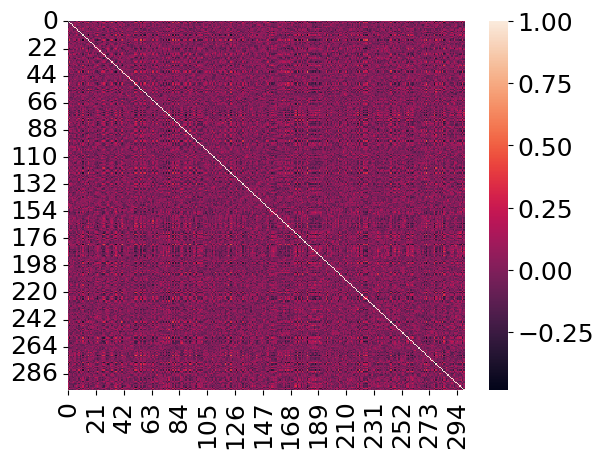

In [ ]:
sns.heatmap(mat_corrs[:, :, 100])

In [ ]:
# calcuate the dynamic isfc correlations use a Laplace kernel
# and width of 10 for 3 simulated subjects, and take the element-wise average correlations across matrices.
width = 10
laplace = {'name': 'Laplace', 'weights': tc.laplace_weights, 'params': {'scale': width}}

dyna_corrs = tc.timecorr(sim_3, combine=tc.corrmean_combine,
                         weights_function=laplace['weights'], weights_params=laplace['params'])

In [ ]:
# again, this returns the vectorized version of the dynamic correlations
print('vectorized shape : ' + str(np.shape(dyna_corrs)))

vectorized shape : (200, 45150)


In [ ]:
# approximate the dynamic isfc correlation, using a Laplace kernel, width 10, and reducing using PCA
width = 10
laplace = {'name': 'Laplace', 'weights': tc.laplace_weights, 'params': {'scale': width}}

dyna_corrs_reduced = tc.timecorr(sim_3, rfun='PCA',
                                 weights_function=laplace['weights'], weights_params=laplace['params'])

In [ ]:
# this returns the approximated dynamic correlations the same size as the original data
print('original shape : ' + str(np.shape(sim_3)))
print('reduced shape : ' + str(np.shape(dyna_corrs_reduced)))

In [ ]:
print('Testing')